In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Debug load data axes

Axes options
    
    S: n samples
    ZYX: Z/Y/X direction 
    T: time
    C: channels (MUST be supplied I think, even if 1)

In [1]:
# debuging 'axes is not a file in the archive'
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


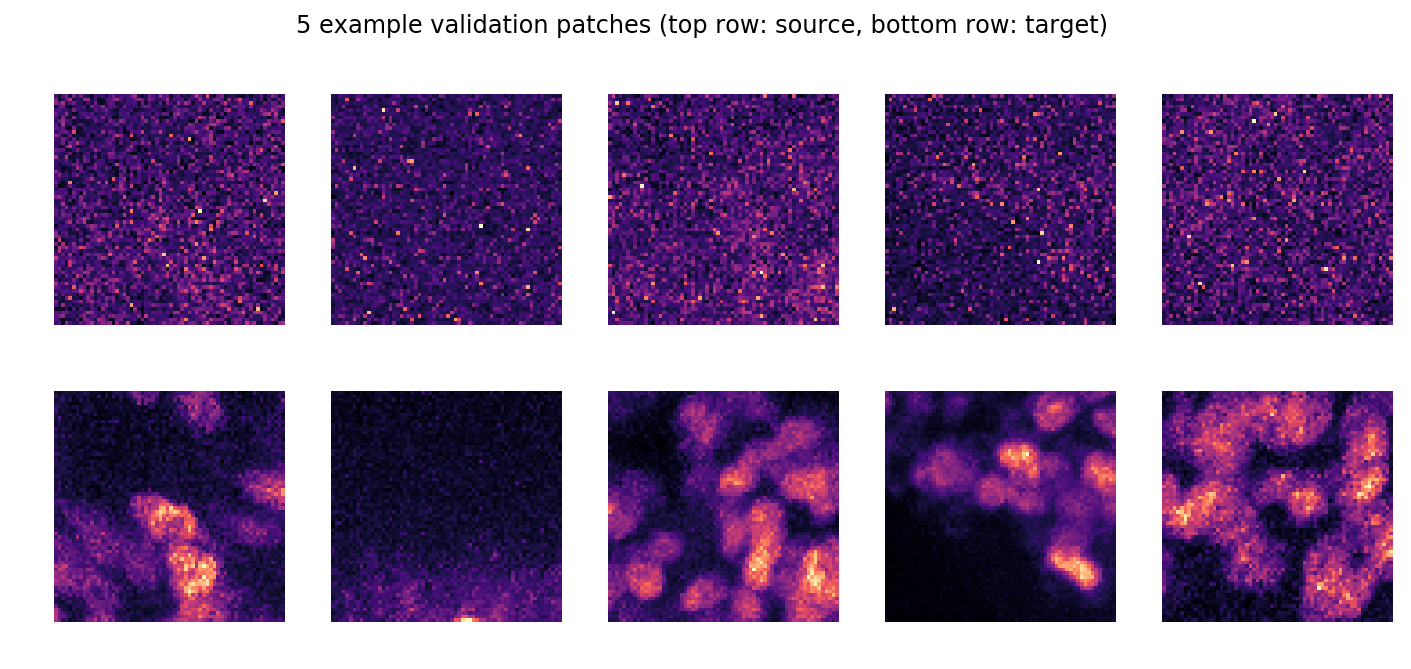

In [4]:
(X,Y), (X_val,Y_val), axes = load_training_data(
    'data/Denoising_Planaria/train_data/data_label.npz', validation_split=0.2, 
    axes='SCZYX', verbose=True)

plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [ ]:
d = 'data/Denoising_Planaria/train_data/data_label.npz'
import numpy as np
dat = np.load(d)

In [3]:
for k, v in dat.items():
    print(k)
    print(v.shape)
    print(v.ndim)
    print(len)

X
(17900, 1, 16, 64, 64)
5
Y
(17900, 1, 16, 64, 64)
5


# Run

In [1]:
%run '1_training.py' 'data/Denoising_Planaria/train_data/data_label.npz' '2019-04-01-planaria_model'

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1
{'n_dim': 3, 'axes': 'ZYXC', 'n_channel_in': 1, 'n_channel_out': 1, 'probabilistic': True, 'unet_residual': True, 'unet_n_depth': 2, 'unet_kern_size': 3, 'unet_n_first': 32, 'unet_last_activation': 'linear', 'unet_input_shape': (None, None, None, 1), 'train_loss': 'laplace', 'train_epochs': 100, 'train_steps_per_epoch': 400, 'train_learning_rate': 0.0004, 'train_batch_size': 16, 'train_tensorboard': True, 'train_checkpoint': 'weights_best.h5', 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use t

400/400 [==============================] - 146s 364ms/step - loss: -1.6793 - mse: 0.0039 - mae: 0.0394 - val_loss: -1.6416 - val_mse: 0.0043 - val_mae: 0.0408
Epoch 85/100
400/400 [==============================] - 146s 364ms/step - loss: -1.6696 - mse: 0.0039 - mae: 0.0398 - val_loss: -1.6523 - val_mse: 0.0042 - val_mae: 0.0405
Epoch 86/100
400/400 [==============================] - 146s 364ms/step - loss: -1.6782 - mse: 0.0039 - mae: 0.0394 - val_loss: -1.6421 - val_mse: 0.0042 - val_mae: 0.0409
Epoch 87/100
400/400 [==============================] - 146s 364ms/step - loss: -1.6774 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6279 - val_mse: 0.0044 - val_mae: 0.0412
Epoch 88/100
400/400 [==============================] - 146s 364ms/step - loss: -1.6749 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6492 - val_mse: 0.0043 - val_mae: 0.0407
Epoch 89/100
400/400 [==============================] - 146s 364ms/step - loss: -1.6808 - mse: 0.0039 - mae: 0.0395 - val_loss: -1.6525 - val_mse: 0.0042

<Figure size 1200x500 with 10 Axes>

<Figure size 1600x500 with 2 Axes>

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpz1zhxw6q/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/home/nikoli/cbsdeep/runs/denoising2D/models/2019-04-01-planaria_model/TF_SavedModel.zip
